<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/TIC_237222864_Vet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [4]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
# lc_0.csv is made for slected sectors or specifically made for this one
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error).bin(time_bin_size=0.012)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 237222864
period = 10.2886967534972  # Orbital period in days
epoch = 1691.66579189594
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 0.3]
folded_lc = folded_lc[folded_lc.time > -0.3]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_237222864_all_sector_lightcurve.csv


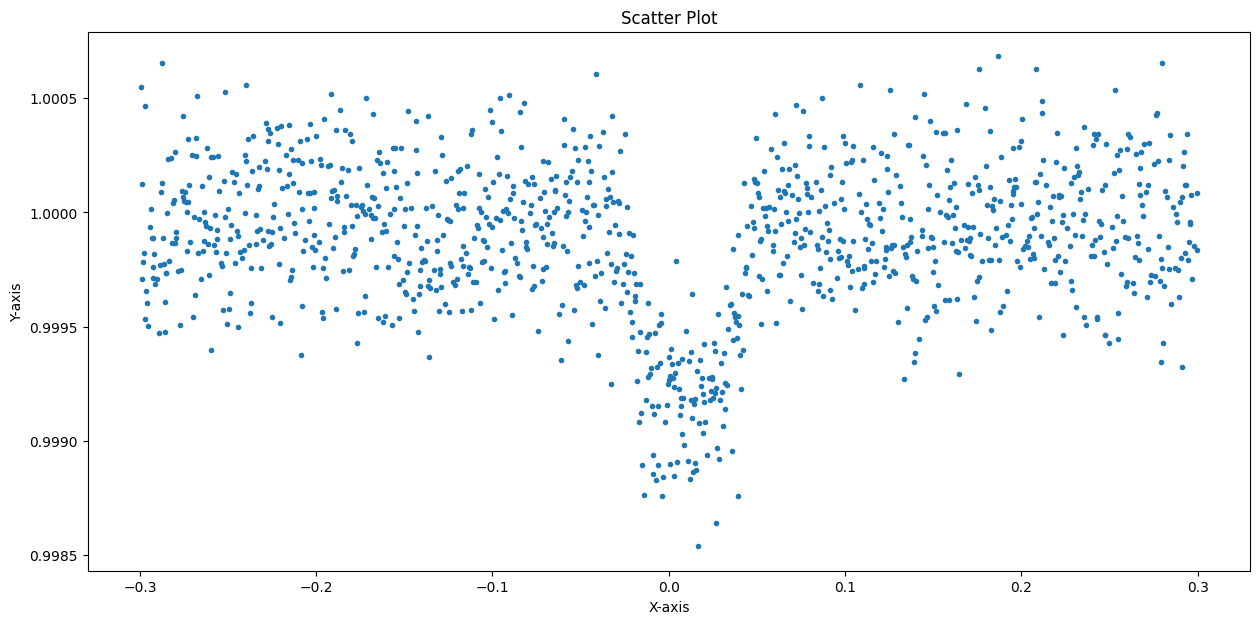

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([51, 52, 53, 54, 55, 56, 57, 58, 59, 60]) # <14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 40, 41, 47, 49, 50, >
target = tr.target(ID=ID, sectors=sectors, search_radius=5) # target radius shorted

<ipython-input-9-4c61ce0cc04b>:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_51, ap_52, ap_53, ap_54, ap_55, ap_56, ap_57, ap_58, ap_59, ap_60])


Sector 51


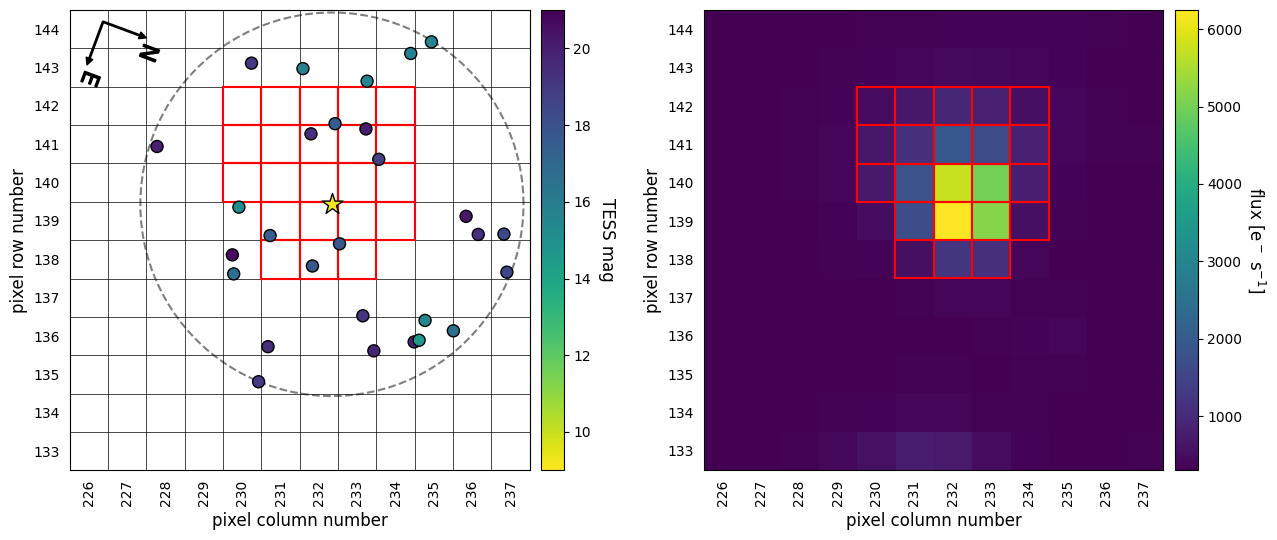

Sector 52


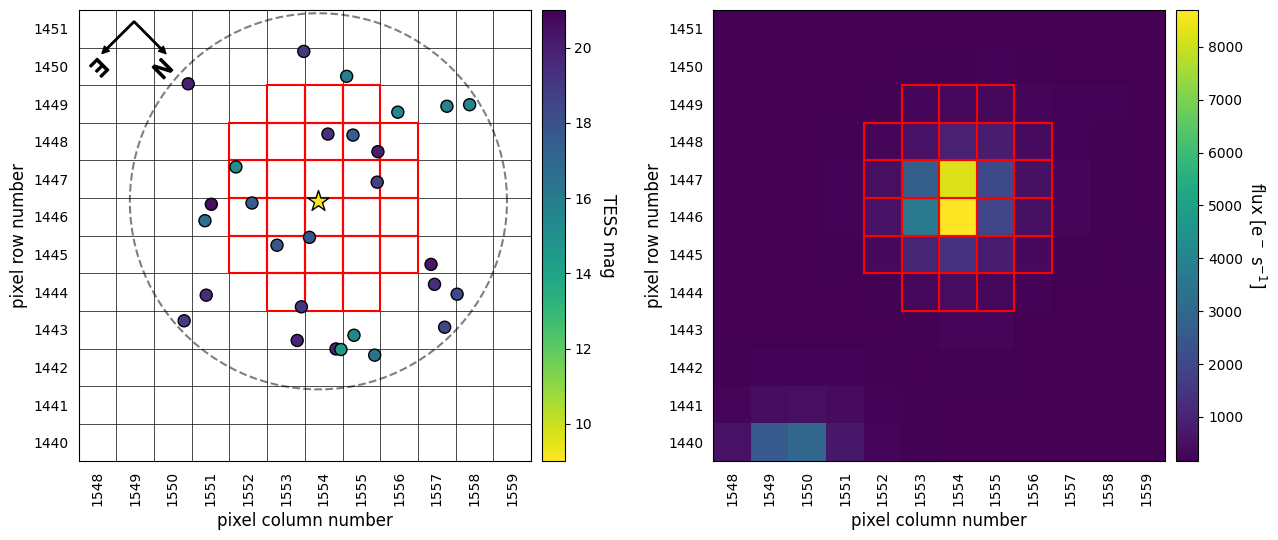

Sector 53


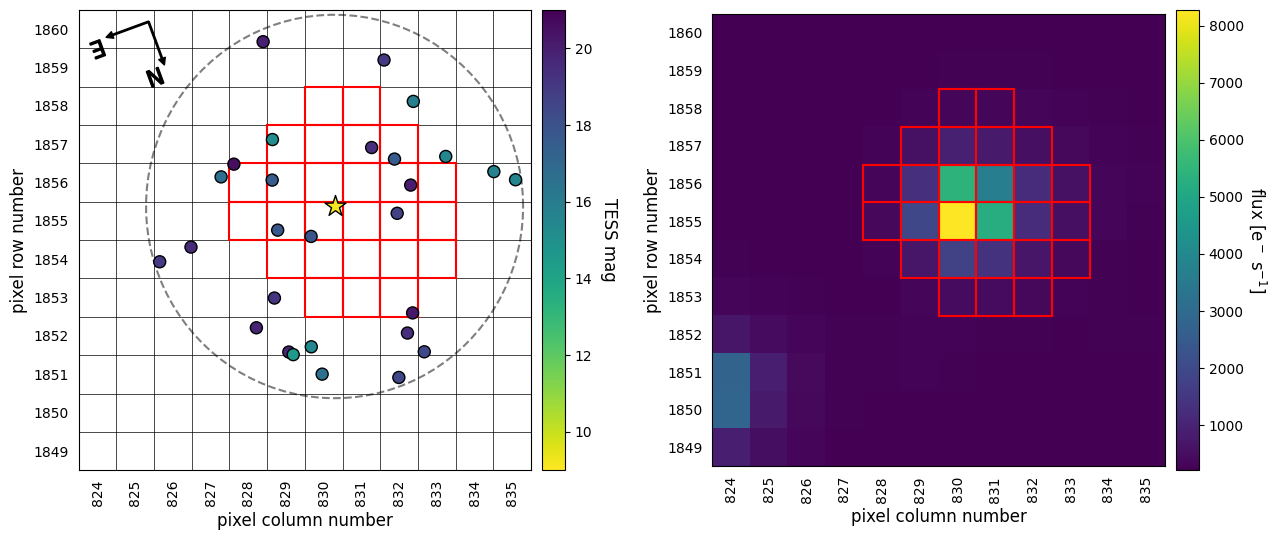

Sector 54


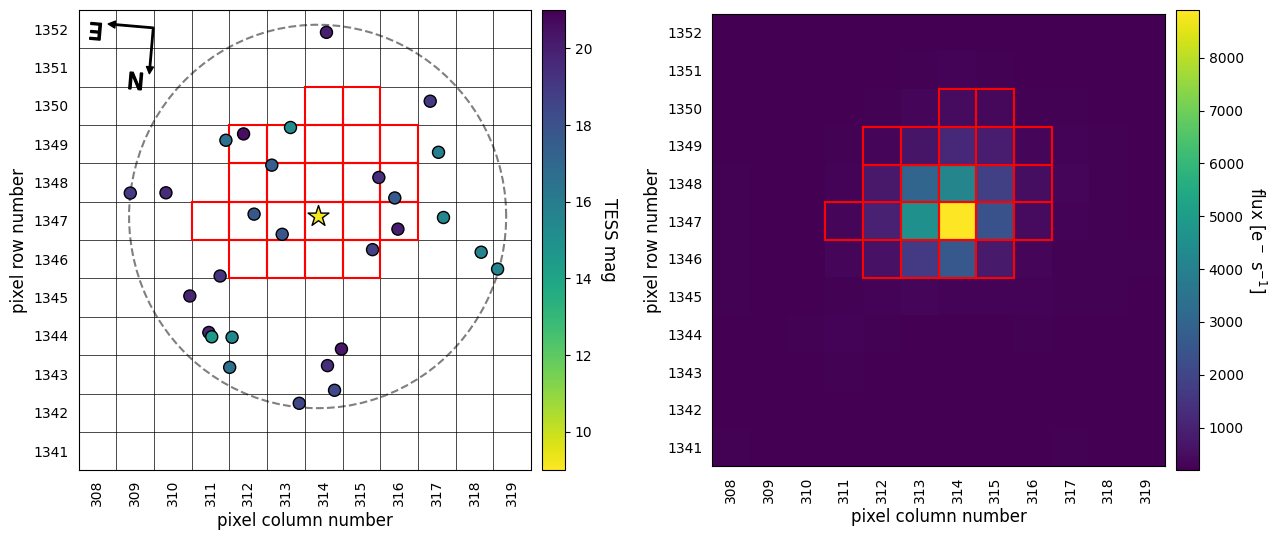

Sector 55


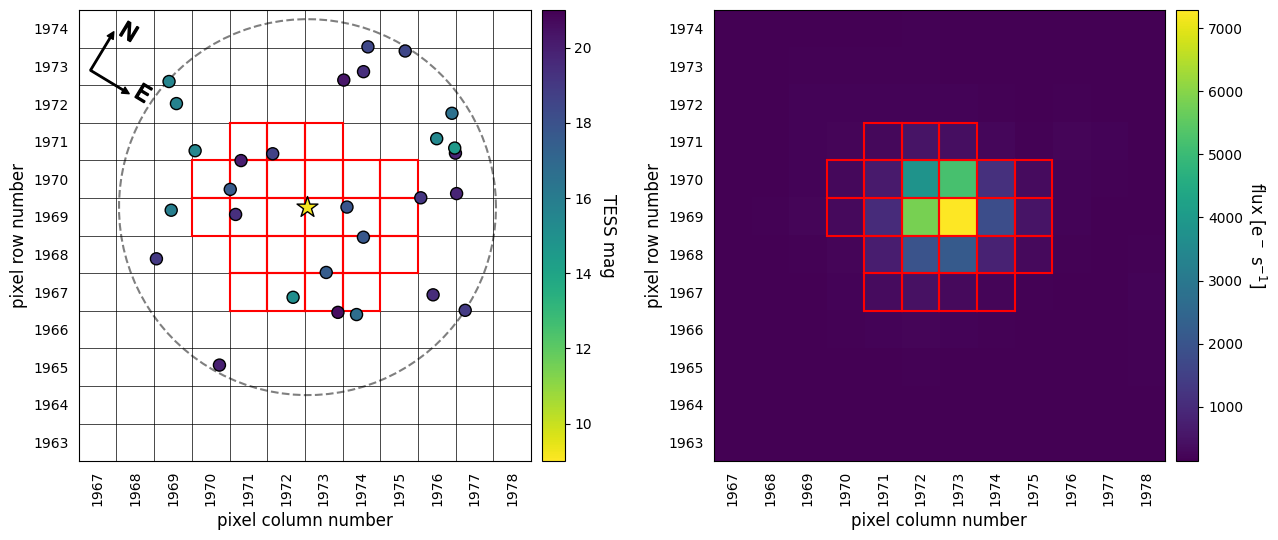

Sector 56


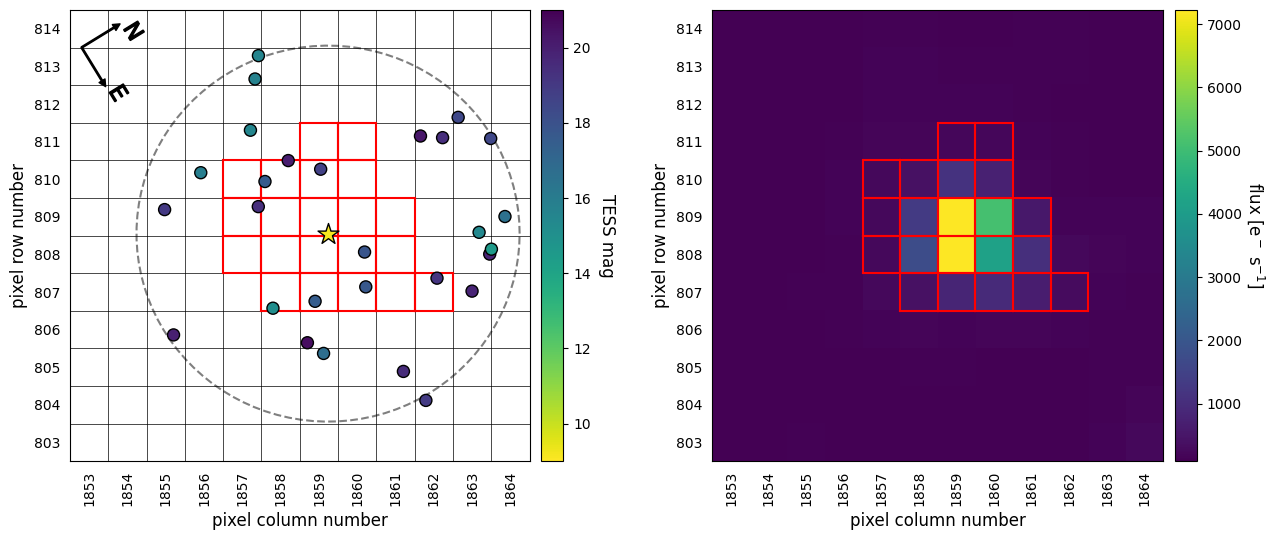

Sector 57


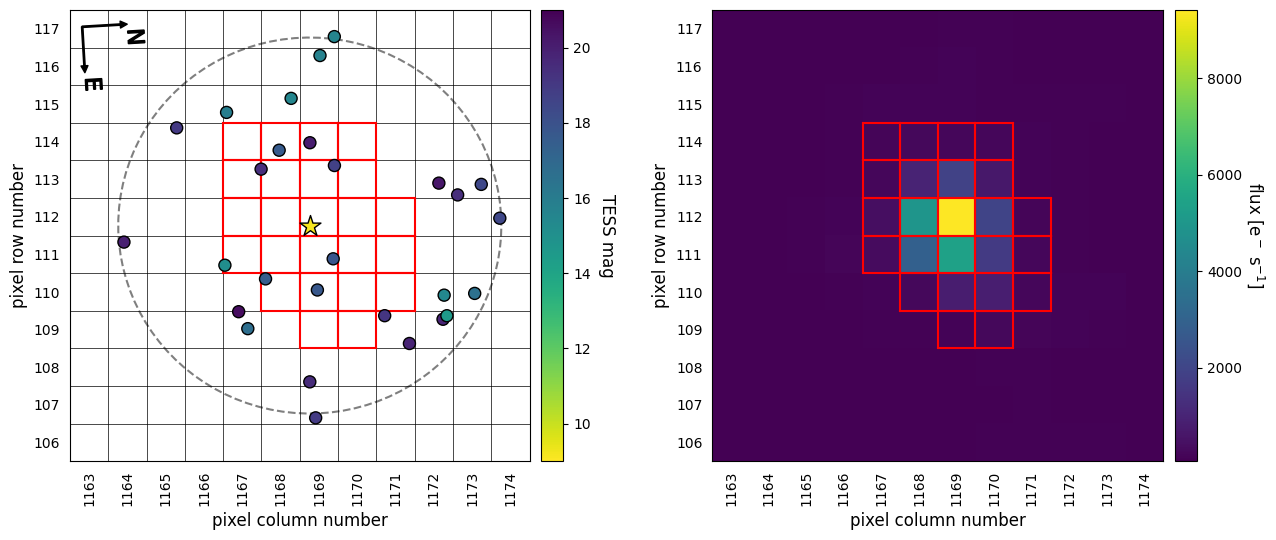

Sector 58


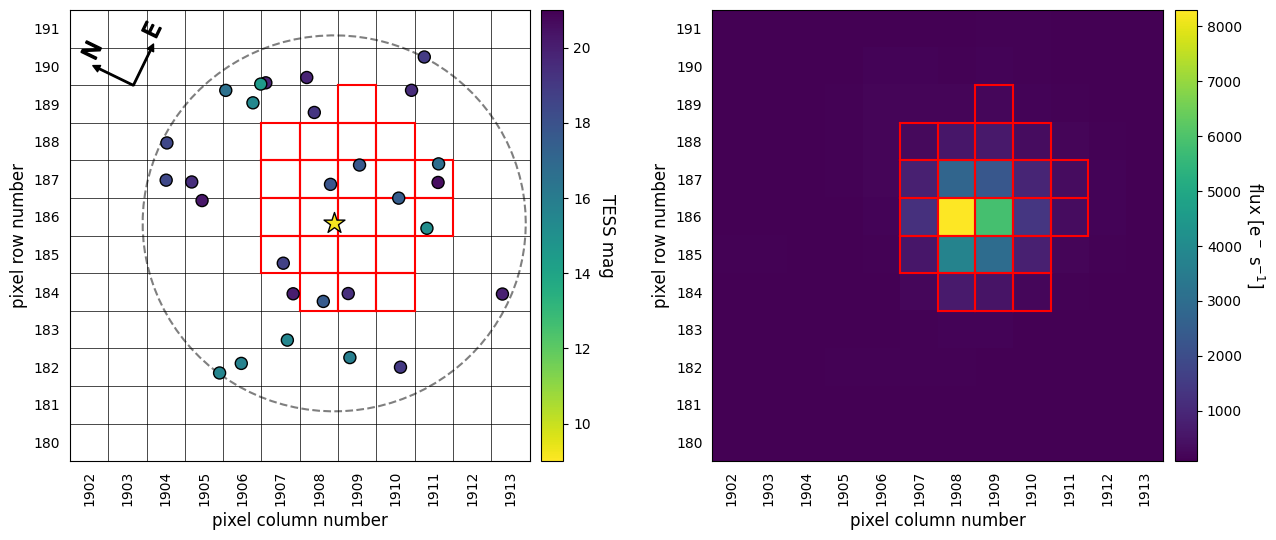

Sector 59


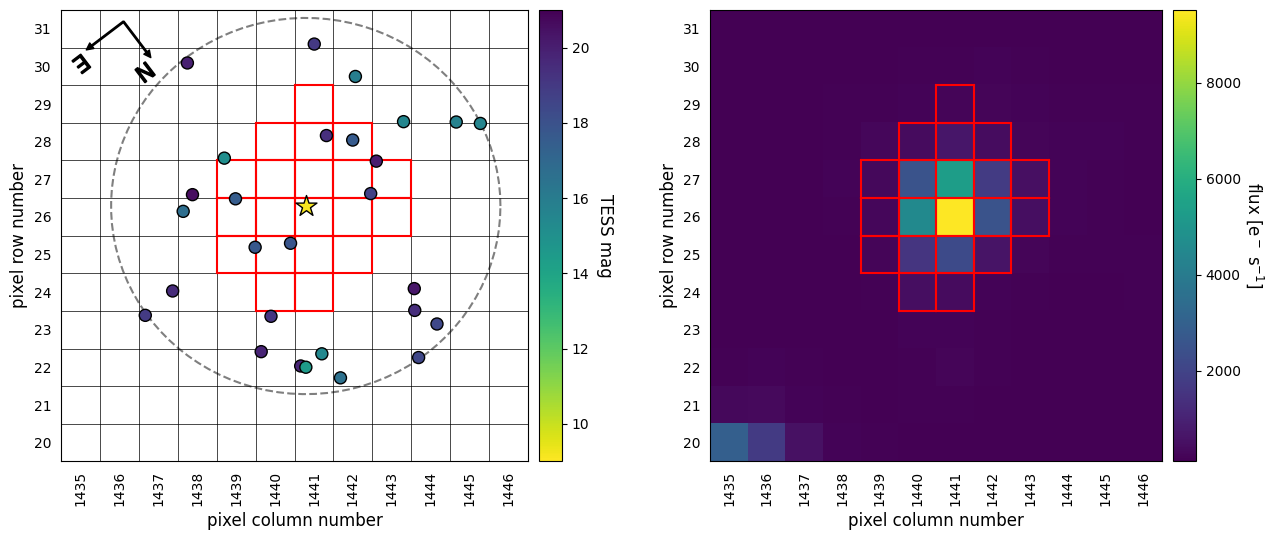

Sector 60


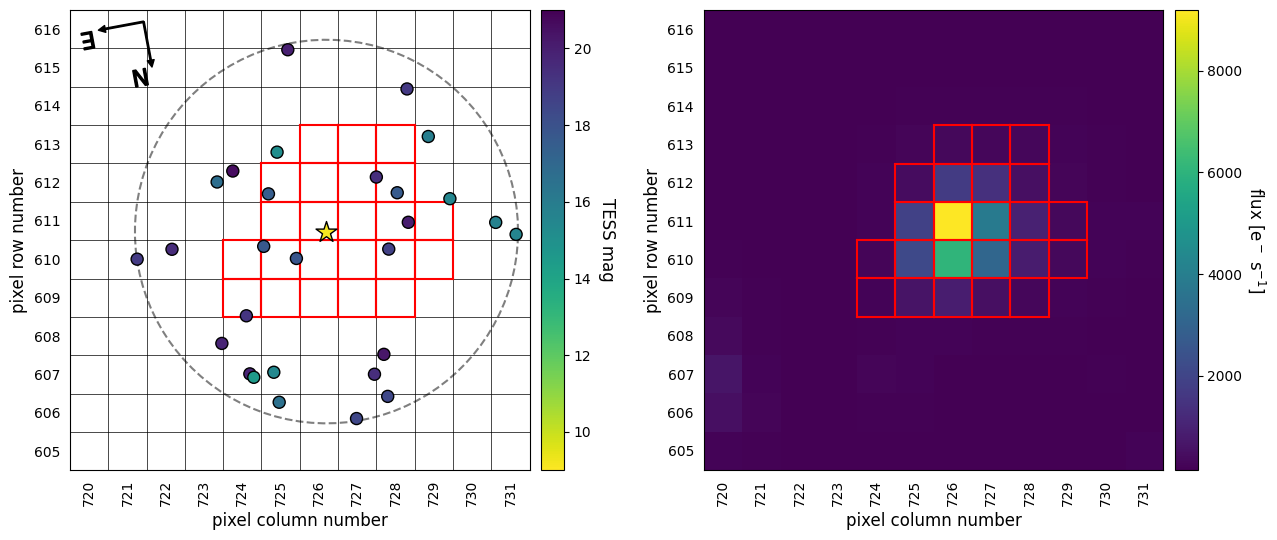

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,237222864,9.1416,8.386,8.008,7.923,296.244328,74.062737,0.86,0.865815,5126.0,15.134100,0.000,0.000
1,1884518866,17.8505,NaN,NaN,NaN,296.262187,74.065713,NaN,NaN,5434.0,0.422260,20.648,58.736
2,1884518861,17.7464,NaN,NaN,NaN,296.278167,74.063019,0.51,0.406037,3614.0,1.545720,33.465,88.246
3,1884518865,18.6916,NaN,NaN,NaN,296.213434,74.067077,NaN,NaN,3421.0,1.749480,34.300,297.111
4,237222869,17.4882,16.459,16.433,16.366,296.271329,74.055631,0.86,1.284960,5107.0,-0.157298,36.974,133.765
5,1884518863,19.3741,NaN,NaN,NaN,296.213904,74.056381,NaN,NaN,3674.0,0.827653,37.794,232.756
6,1884518864,17.6245,NaN,NaN,NaN,296.204361,74.059243,1.04,0.852787,5780.0,0.009558,41.466,252.363
7,1884518867,20.0364,NaN,NaN,NaN,296.201046,74.063803,NaN,NaN,NaN,0.368929,42.956,275.146
8,237222872,15.1249,14.313,13.912,13.968,296.263378,74.049904,0.93,1.034830,5352.0,0.819585,49.893,157.808
9,1884518902,19.1645,NaN,NaN,NaN,296.292966,74.072462,NaN,NaN,3689.0,1.131870,59.463,53.906


In [9]:
# ap_14 = np.array([[1921.0, 1360.0], [1921.0, 1361.0], [1921.0, 1362.0], [1921.0, 1363.0],
#       [1922.0, 1359.0], [1922.0, 1360.0], [1922.0, 1361.0], [1922.0, 1362.0], [1922.0,
#         1363.0], [1922.0, 1364.0], [1923.0, 1359.0], [1923.0, 1360.0], [1923.0, 1361.0],
#       [1923.0, 1362.0], [1923.0, 1363.0], [1923.0, 1364.0], [1924.0, 1359.0], [1924.0,
#         1360.0], [1924.0, 1361.0], [1924.0, 1362.0], [1924.0, 1363.0], [1924.0, 1364.0],
#       [1925.0, 1360.0], [1925.0, 1361.0], [1925.0, 1362.0], [1925.0, 1363.0], [1926.0,
#         1360.0], [1926.0, 1361.0]])
# ap_15 = np.array([[1964.0, 420.0], [1964.0, 421.0], [1964.0,
#         422.0], [1965.0, 420.0], [1965.0, 421.0], [1965.0, 422.0], [1965.0, 423.0],
#       [1966.0, 420.0], [1966.0, 421.0], [1966.0, 422.0], [1966.0, 423.0], [1966.0,
#         424.0], [1967.0, 420.0], [1967.0, 421.0], [1967.0, 422.0], [1967.0, 423.0],
#       [1967.0, 424.0], [1968.0, 419.0], [1968.0, 420.0], [1968.0, 421.0], [1968.0,
#         422.0], [1968.0, 423.0], [1968.0, 424.0], [1969.0, 420.0]])
# ap_16 = np.array([[581.0, 384.0],
#       [581.0, 385.0], [581.0, 386.0], [582.0, 384.0], [582.0, 385.0], [582.0, 386.0],
#       [582.0, 387.0], [582.0, 388.0], [582.0, 389.0], [583.0, 384.0], [583.0, 385.0],
#       [583.0, 386.0], [583.0, 387.0], [583.0, 388.0], [583.0, 389.0], [584.0, 384.0],
#       [584.0, 385.0], [584.0, 386.0], [584.0, 387.0], [584.0, 388.0], [585.0, 385.0],
#       [585.0, 386.0], [585.0, 387.0], [586.0, 385.0], [586.0, 386.0]])
# ap_17 = np.array([[847.0,
#         302.0], [847.0, 303.0], [847.0, 304.0], [847.0, 305.0], [848.0, 301.0], [
#         848.0, 302.0], [848.0, 303.0], [848.0, 304.0], [848.0, 305.0], [848.0, 306.0],
#       [849.0, 301.0], [849.0, 302.0], [849.0, 303.0], [849.0, 304.0], [849.0, 305.0],
#       [850.0, 301.0], [850.0, 302.0], [850.0, 303.0], [850.0, 304.0], [850.0, 305.0],
#       [851.0, 302.0], [851.0, 303.0], [851.0, 304.0]])
# ap_19 = np.array([[1272.0, 309.0], [1272.0,
#         310.0], [1273.0, 308.0], [1273.0, 309.0], [1273.0, 310.0], [1273.0, 311.0],
#       [1273.0, 312.0], [1274.0, 308.0], [1274.0, 309.0], [1274.0, 310.0], [1274.0,
#         311.0], [1274.0, 312.0], [1275.0, 308.0], [1275.0, 309.0], [1275.0, 310.0],
#       [1275.0, 311.0], [1275.0, 312.0], [1276.0, 309.0], [1276.0, 310.0], [1276.0,
#         311.0], [1276.0, 312.0], [1277.0, 310.0]])
# ap_20 = np.array([[547.0, 917.0], [547.0, 918.0],
#       [547.0, 919.0], [548.0, 917.0], [548.0, 918.0], [548.0, 919.0], [548.0, 920.0],
#       [549.0, 917.0], [549.0, 918.0], [549.0, 919.0], [549.0, 920.0], [549.0, 921.0],
#       [550.0, 917.0], [550.0, 918.0], [550.0, 919.0], [550.0, 920.0], [551.0, 917.0],
#       [551.0, 918.0], [551.0, 919.0], [551.0, 920.0]])
# ap_21 = np.array([[178.0, 1843.0], [179.0,
#         1842.0], [179.0, 1843.0], [179.0, 1844.0], [180.0, 1841.0], [180.0, 1842.0],
#       [180.0, 1843.0], [180.0, 1844.0], [180.0, 1845.0], [181.0, 1841.0], [181.0,
#         1842.0], [181.0, 1843.0], [181.0, 1844.0], [181.0, 1845.0], [182.0, 1841.0],
#       [182.0, 1842.0], [182.0, 1843.0], [182.0, 1844.0], [182.0, 1845.0], [183.0,
#         1842.0], [183.0, 1843.0], [183.0, 1844.0]])
# ap_22 = np.array([[1827.0, 1369.0], [1827.0,
#         1370.0], [1827.0, 1371.0], [1827.0, 1372.0], [1828.0, 1369.0], [1828.0, 1370.0],
#       [1828.0, 1371.0], [1828.0, 1372.0], [1828.0, 1373.0], [1829.0, 1369.0], [1829.0,
#         1370.0], [1829.0, 1371.0], [1829.0, 1372.0], [1829.0, 1373.0], [1830.0, 1369.0],
#       [1830.0, 1370.0], [1830.0, 1371.0], [1830.0, 1372.0], [1831.0, 1369.0], [1831.0,
#         1370.0], [1831.0, 1371.0]])
# ap_23 = np.array([[1255.0, 585.0], [1255.0, 586.0], [1256.0,
#         584.0], [1256.0, 585.0], [1256.0, 586.0], [1256.0, 587.0], [1257.0, 584.0],
#       [1257.0, 585.0], [1257.0, 586.0], [1257.0, 587.0], [1257.0, 588.0], [1258.0,
#         583.0], [1258.0, 584.0], [1258.0, 585.0], [1258.0, 586.0], [1258.0, 587.0],
#       [1258.0, 588.0], [1259.0, 583.0], [1259.0, 584.0], [1259.0, 585.0], [1259.0,
#         586.0], [1259.0, 587.0], [1259.0, 588.0]])
# ap_24 = np.array([[403.0, 1396.0], [403.0, 1397.0],
#       [403.0, 1398.0], [403.0, 1399.0], [404.0, 1395.0], [404.0, 1396.0], [404.0,
#         1397.0], [404.0, 1398.0], [404.0, 1399.0], [404.0, 1400.0], [405.0, 1395.0],
#       [405.0, 1396.0], [405.0, 1397.0], [405.0, 1398.0], [405.0, 1399.0], [405.0,
#         1400.0], [406.0, 1395.0], [406.0, 1396.0], [406.0, 1397.0], [406.0, 1398.0],
#       [406.0, 1399.0], [407.0, 1396.0], [407.0, 1397.0], [407.0, 1398.0], [407.0,
#         1399.0]])
# ap_25 = np.array([[1692.0, 1407.0], [1692.0, 1408.0], [1693.0, 1406.0], [1693.0,
#         1407.0], [1693.0, 1408.0], [1693.0, 1409.0], [1693.0, 1410.0], [1694.0, 1406.0],
#       [1694.0, 1407.0], [1694.0, 1408.0], [1694.0, 1409.0], [1694.0, 1410.0], [1695.0,
#         1406.0], [1695.0, 1407.0], [1695.0, 1408.0], [1695.0, 1409.0], [1695.0, 1410.0],
#       [1696.0, 1406.0], [1696.0, 1407.0], [1696.0, 1408.0], [1696.0, 1409.0], [1696.0,
#         1410.0], [1697.0, 1408.0]])
# ap_26 = np.array([[926.0, 1773.0], [926.0, 1774.0], [926.0,
#         1775.0], [926.0, 1776.0], [927.0, 1773.0], [927.0, 1774.0], [927.0, 1775.0],
#       [927.0, 1776.0], [927.0, 1777.0], [928.0, 1772.0], [928.0, 1773.0], [928.0,
#         1774.0], [928.0, 1775.0], [928.0, 1776.0], [928.0, 1777.0], [929.0, 1773.0],
#       [929.0, 1774.0], [929.0, 1775.0], [929.0, 1776.0], [929.0, 1777.0], [930.0,
#         1773.0], [930.0, 1774.0], [930.0, 1775.0], [930.0, 1776.0]])
# ap_40 = np.array([[1595.0,
#         2029.0], [1595.0, 2030.0], [1595.0, 2031.0], [1595.0, 2032.0], [1596.0, 2028.0],
#       [1596.0, 2029.0], [1596.0, 2030.0], [1596.0, 2031.0], [1596.0, 2032.0], [1597.0,
#         2028.0], [1597.0, 2029.0], [1597.0, 2030.0], [1597.0, 2031.0], [1597.0, 2032.0],
#       [1597.0, 2033.0], [1598.0, 2028.0], [1598.0, 2029.0], [1598.0, 2030.0], [1598.0,
#         2031.0], [1598.0, 2032.0], [1599.0, 2029.0], [1599.0, 2030.0], [1599.0, 2031.0],
#       [1599.0, 2032.0], [1600.0, 2030.0]])
# ap_41 = np.array([[1967.0, 1159.0], [1967.0, 1160.0],
#       [1967.0, 1161.0], [1967.0, 1162.0], [1968.0, 1159.0], [1968.0, 1160.0], [1968.0,
#         1161.0], [1968.0, 1162.0], [1968.0, 1163.0], [1969.0, 1159.0], [1969.0, 1160.0],
#       [1969.0, 1161.0], [1969.0, 1162.0], [1969.0, 1163.0], [1969.0, 1164.0], [1970.0,
#         1159.0], [1970.0, 1160.0], [1970.0, 1161.0], [1970.0, 1162.0], [1970.0, 1163.0],
#       [1971.0, 1159.0], [1971.0, 1160.0], [1971.0, 1161.0], [1971.0, 1162.0]])
# ap_47 = np.array([[409.0, 1134.0], [409.0, 1135.0], [409.0, 1136.0], [410.0, 1134.0], [410.0,
#         1135.0], [410.0, 1136.0], [410.0, 1137.0], [411.0, 1134.0], [411.0, 1135.0],
#       [411.0, 1136.0], [411.0, 1137.0], [412.0, 1134.0], [412.0, 1135.0], [412.0,
#         1136.0], [412.0, 1137.0], [413.0, 1134.0], [413.0, 1135.0], [413.0, 1136.0]])
# ap_49 = np.array([[1714.0, 1136.0], [1714.0, 1137.0], [1714.0, 1138.0], [1715.0, 1136.0], [
#         1715.0, 1137.0], [1715.0, 1138.0], [1715.0, 1139.0], [1716.0, 1135.0], [1716.0,
#         1136.0], [1716.0, 1137.0], [1716.0, 1138.0], [1716.0, 1139.0], [1716.0, 1140.0],
#       [1717.0, 1135.0], [1717.0, 1136.0], [1717.0, 1137.0], [1717.0, 1138.0], [1717.0,
#         1139.0], [1717.0, 1140.0], [1718.0, 1135.0], [1718.0, 1136.0], [1718.0, 1137.0],
#       [1718.0, 1138.0], [1718.0, 1139.0], [1719.0, 1136.0], [1719.0, 1137.0]])
# ap_50 = np.array([[1068.0, 447.0], [1068.0, 448.0], [1069.0, 446.0], [1069.0, 447.0], [1069.0,
#         448.0], [1069.0, 449.0], [1070.0, 446.0], [1070.0, 447.0], [1070.0, 448.0],
#       [1070.0, 449.0], [1070.0, 450.0], [1071.0, 445.0], [1071.0, 446.0], [1071.0,
#         447.0], [1071.0, 448.0], [1071.0, 449.0], [1071.0, 450.0], [1072.0, 445.0],
#       [1072.0, 446.0], [1072.0, 447.0], [1072.0, 448.0], [1072.0, 449.0], [1072.0,
#         450.0], [1073.0, 446.0], [1073.0, 447.0], [1073.0, 448.0], [1073.0, 449.0]])
ap_51 = np.array([[230.0, 140.0], [230.0, 141.0], [230.0, 142.0], [231.0, 138.0], [231.0, 139.0],
      [231.0, 140.0], [231.0, 141.0], [231.0, 142.0], [232.0, 138.0], [232.0, 139.0],
      [232.0, 140.0], [232.0, 141.0], [232.0, 142.0], [233.0, 138.0], [233.0, 139.0],
      [233.0, 140.0], [233.0, 141.0], [233.0, 142.0], [234.0, 139.0], [234.0, 140.0],
      [234.0, 141.0], [234.0, 142.0]])
ap_52 = np.array([[1552.0, 1445.0], [1552.0, 1446.0], [
        1552.0, 1447.0], [1552.0, 1448.0], [1553.0, 1444.0], [1553.0, 1445.0], [1553.0,
        1446.0], [1553.0, 1447.0], [1553.0, 1448.0], [1553.0, 1449.0], [1554.0, 1444.0],
      [1554.0, 1445.0], [1554.0, 1446.0], [1554.0, 1447.0], [1554.0, 1448.0], [1554.0,
        1449.0], [1555.0, 1444.0], [1555.0, 1445.0], [1555.0, 1446.0], [1555.0, 1447.0],
      [1555.0, 1448.0], [1555.0, 1449.0], [1556.0, 1445.0], [1556.0, 1446.0], [1556.0,
        1447.0], [1556.0, 1448.0]])
ap_53 = np.array([[828.0, 1855.0], [828.0, 1856.0], [829.0,
        1854.0], [829.0, 1855.0], [829.0, 1856.0], [829.0, 1857.0], [830.0, 1853.0],
      [830.0, 1854.0], [830.0, 1855.0], [830.0, 1856.0], [830.0, 1857.0], [830.0,
        1858.0], [831.0, 1853.0], [831.0, 1854.0], [831.0, 1855.0], [831.0, 1856.0],
      [831.0, 1857.0], [831.0, 1858.0], [832.0, 1853.0], [832.0, 1854.0], [832.0,
        1855.0], [832.0, 1856.0], [832.0, 1857.0], [833.0, 1854.0], [833.0, 1855.0],
      [833.0, 1856.0]])
ap_54 = np.array([[311.0, 1347.0], [312.0, 1346.0], [312.0, 1347.0], [
        312.0, 1348.0], [312.0, 1349.0], [313.0, 1346.0], [313.0, 1347.0], [313.0,
        1348.0], [313.0, 1349.0], [314.0, 1346.0], [314.0, 1347.0], [314.0, 1348.0],
      [314.0, 1349.0], [314.0, 1350.0], [315.0, 1346.0], [315.0, 1347.0], [315.0,
        1348.0], [315.0, 1349.0], [315.0, 1350.0], [316.0, 1347.0], [316.0, 1348.0],
      [316.0, 1349.0]])
ap_55 = np.array([[1970.0, 1969.0], [1970.0, 1970.0], [1971.0, 1967.0],
      [1971.0, 1968.0], [1971.0, 1969.0], [1971.0, 1970.0], [1971.0, 1971.0], [1972.0,
        1967.0], [1972.0, 1968.0], [1972.0, 1969.0], [1972.0, 1970.0], [1972.0, 1971.0],
      [1973.0, 1967.0], [1973.0, 1968.0], [1973.0, 1969.0], [1973.0, 1970.0], [1973.0,
        1971.0], [1974.0, 1967.0], [1974.0, 1968.0], [1974.0, 1969.0], [1974.0, 1970.0],
      [1975.0, 1968.0], [1975.0, 1969.0], [1975.0, 1970.0]])
ap_56 = np.array([[1857.0, 808.0],
      [1857.0, 809.0], [1857.0, 810.0], [1858.0, 807.0], [1858.0, 808.0], [1858.0,
        809.0], [1858.0, 810.0], [1859.0, 807.0], [1859.0, 808.0], [1859.0, 809.0],
      [1859.0, 810.0], [1859.0, 811.0], [1860.0, 807.0], [1860.0, 808.0], [1860.0,
        809.0], [1860.0, 810.0], [1860.0, 811.0], [1861.0, 807.0], [1861.0, 808.0],
      [1861.0, 809.0], [1862.0, 807.0]])
ap_57 = np.array([[1167.0, 111.0], [1167.0, 112.0], [
        1167.0, 113.0], [1167.0, 114.0], [1168.0, 110.0], [1168.0, 111.0], [1168.0,
        112.0], [1168.0, 113.0], [1168.0, 114.0], [1169.0, 109.0], [1169.0, 110.0],
      [1169.0, 111.0], [1169.0, 112.0], [1169.0, 113.0], [1169.0, 114.0], [1170.0,
        109.0], [1170.0, 110.0], [1170.0, 111.0], [1170.0, 112.0], [1170.0, 113.0],
      [1170.0, 114.0], [1171.0, 110.0], [1171.0, 111.0], [1171.0, 112.0]])
ap_58 = np.array([[
        1907.0, 185.0], [1907.0, 186.0], [1907.0, 187.0], [1907.0, 188.0], [1908.0,
        184.0], [1908.0, 185.0], [1908.0, 186.0], [1908.0, 187.0], [1908.0, 188.0],
      [1909.0, 184.0], [1909.0, 185.0], [1909.0, 186.0], [1909.0, 187.0], [1909.0,
        188.0], [1909.0, 189.0], [1910.0, 184.0], [1910.0, 185.0], [1910.0, 186.0],
      [1910.0, 187.0], [1910.0, 188.0], [1911.0, 186.0], [1911.0, 187.0]])
ap_59 = np.array([[
        1439.0, 25.0], [1439.0, 26.0], [1439.0, 27.0], [1440.0, 24.0], [1440.0, 25.0],
      [1440.0, 26.0], [1440.0, 27.0], [1440.0, 28.0], [1441.0, 24.0], [1441.0, 25.0],
      [1441.0, 26.0], [1441.0, 27.0], [1441.0, 28.0], [1441.0, 29.0], [1442.0, 25.0],
      [1442.0, 26.0], [1442.0, 27.0], [1442.0, 28.0], [1443.0, 26.0], [1443.0, 27.0]])
ap_60 = np.array([[724.0, 609.0], [724.0, 610.0], [725.0, 609.0], [725.0, 610.0], [725.0, 611.0],
      [725.0, 612.0], [726.0, 609.0], [726.0, 610.0], [726.0, 611.0], [726.0, 612.0],
      [726.0, 613.0], [727.0, 609.0], [727.0, 610.0], [727.0, 611.0], [727.0, 612.0],
      [727.0, 613.0], [728.0, 609.0], [728.0, 610.0], [728.0, 611.0], [728.0, 612.0],
      [728.0, 613.0], [729.0, 610.0], [729.0, 611.0]])

apertures = np.array([ap_51, ap_52, ap_53, ap_54, ap_55, ap_56, ap_57, ap_58, ap_59, ap_60])
# <ap_14, ap_15, ap_16, ap_17, ap_19, ap_20, ap_21, ap_22, ap_23, ap_24, ap_25, ap_26, ap_40, ap_41, ap_47, ap_49, ap_50, >

for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [10]:
target.calc_depths(tdepth=0.362, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,237222864,9.1416,8.386,8.008,7.923,296.244328,74.062737,0.86,0.865815,5126.0,15.134100,0.000,0.000,9.947243e-01,0.36392
1,1884518866,17.8505,NaN,NaN,NaN,296.262187,74.065713,NaN,NaN,5434.0,0.422260,20.648,58.736,3.124134e-04,0.00000
2,1884518861,17.7464,NaN,NaN,NaN,296.278167,74.063019,0.51,0.406037,3614.0,1.545720,33.465,88.246,3.049556e-04,0.00000
3,1884518865,18.6916,NaN,NaN,NaN,296.213434,74.067077,NaN,NaN,3421.0,1.749480,34.300,297.111,1.267380e-04,0.00000
4,237222869,17.4882,16.459,16.433,16.366,296.271329,74.055631,0.86,1.284960,5107.0,-0.157298,36.974,133.765,3.417353e-04,0.00000
5,1884518863,19.3741,NaN,NaN,NaN,296.213904,74.056381,NaN,NaN,3674.0,0.827653,37.794,232.756,6.960845e-05,0.00000
6,1884518864,17.6245,NaN,NaN,NaN,296.204361,74.059243,1.04,0.852787,5780.0,0.009558,41.466,252.363,3.149867e-04,0.00000
7,1884518867,20.0364,NaN,NaN,NaN,296.201046,74.063803,NaN,NaN,NaN,0.368929,42.956,275.146,3.169373e-05,0.00000
8,237222872,15.1249,14.313,13.912,13.968,296.263378,74.049904,0.93,1.034830,5352.0,0.819585,49.893,157.808,1.975750e-03,0.00000
9,1884518902,19.1645,NaN,NaN,NaN,296.292966,74.072462,NaN,NaN,3689.0,1.131870,59.463,53.906,3.501929e-05,0.00000


In [11]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 237222864.
Calculating EB and EBx2P scenario probabilities for 237222864.
Calculating PTP scenario probability for 237222864.
Calculating PEB and PEBx2P scenario probabilities for 237222864.
Calculating STP scenario probability for 237222864.
Calculating SEB and SEBx2P scenario probabilities for 237222864.
Calculating DTP scenario probability for 237222864.
Calculating DEB and DEBx2P scenario probabilities for 237222864.
Calculating BTP scenario probability for 237222864.
Calculating BEB and BEBx2P scenario probabilities for 237222864.
CPU times: user 1min 16s, sys: 1.33 s, total: 1min 17s
Wall time: 58.8 s


In [12]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 0.99999844
NFPP = 0.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,237222864,TP,0.860000,0.865815,10.288697,88.148236,0.625458,0.593945,206.915116,3.473209,0.000000,0.000000,4.800463e-11
1,237222864,EB,0.860000,0.865815,10.288697,85.750232,1.959911,0.050642,35.764835,0.000000,0.814042,0.840536,1.971997e-127
2,237222864,EBx2P,0.860000,0.865815,20.577394,88.127300,1.248117,0.600268,206.859813,0.000000,0.834618,0.861141,9.999965e-01
3,237222864,PTP,0.860000,0.865815,10.288697,88.242113,0.332762,0.761063,191.508529,13.665795,0.000000,0.000000,1.561475e-06
4,237222864,PEB,0.860000,0.865815,10.288697,85.065460,1.748714,0.272320,59.159474,0.000000,0.775966,0.804490,6.103395e-133
5,237222864,PEBx2P,0.860000,0.865815,20.577394,88.267254,1.072979,0.532599,193.261520,0.000000,0.831155,0.857590,1.456579e-13
6,237222864,STP,0.767503,0.796622,10.288697,88.168573,0.624463,0.626357,207.419628,6.594611,0.000000,0.000000,4.596947e-19
7,237222864,SEB,0.170005,0.201906,10.288697,89.397751,0.493063,0.419958,180.675559,0.000000,0.019888,0.100000,6.064514e-22
8,237222864,SEBx2P,0.380868,0.385850,20.577394,88.483503,1.600969,0.786156,222.397032,0.000000,0.369610,0.376380,1.950582e-06
9,237222864,DTP,0.860000,0.865815,10.288697,87.438949,0.979135,0.717613,225.978022,2.726262,0.000000,0.000000,2.227712e-15


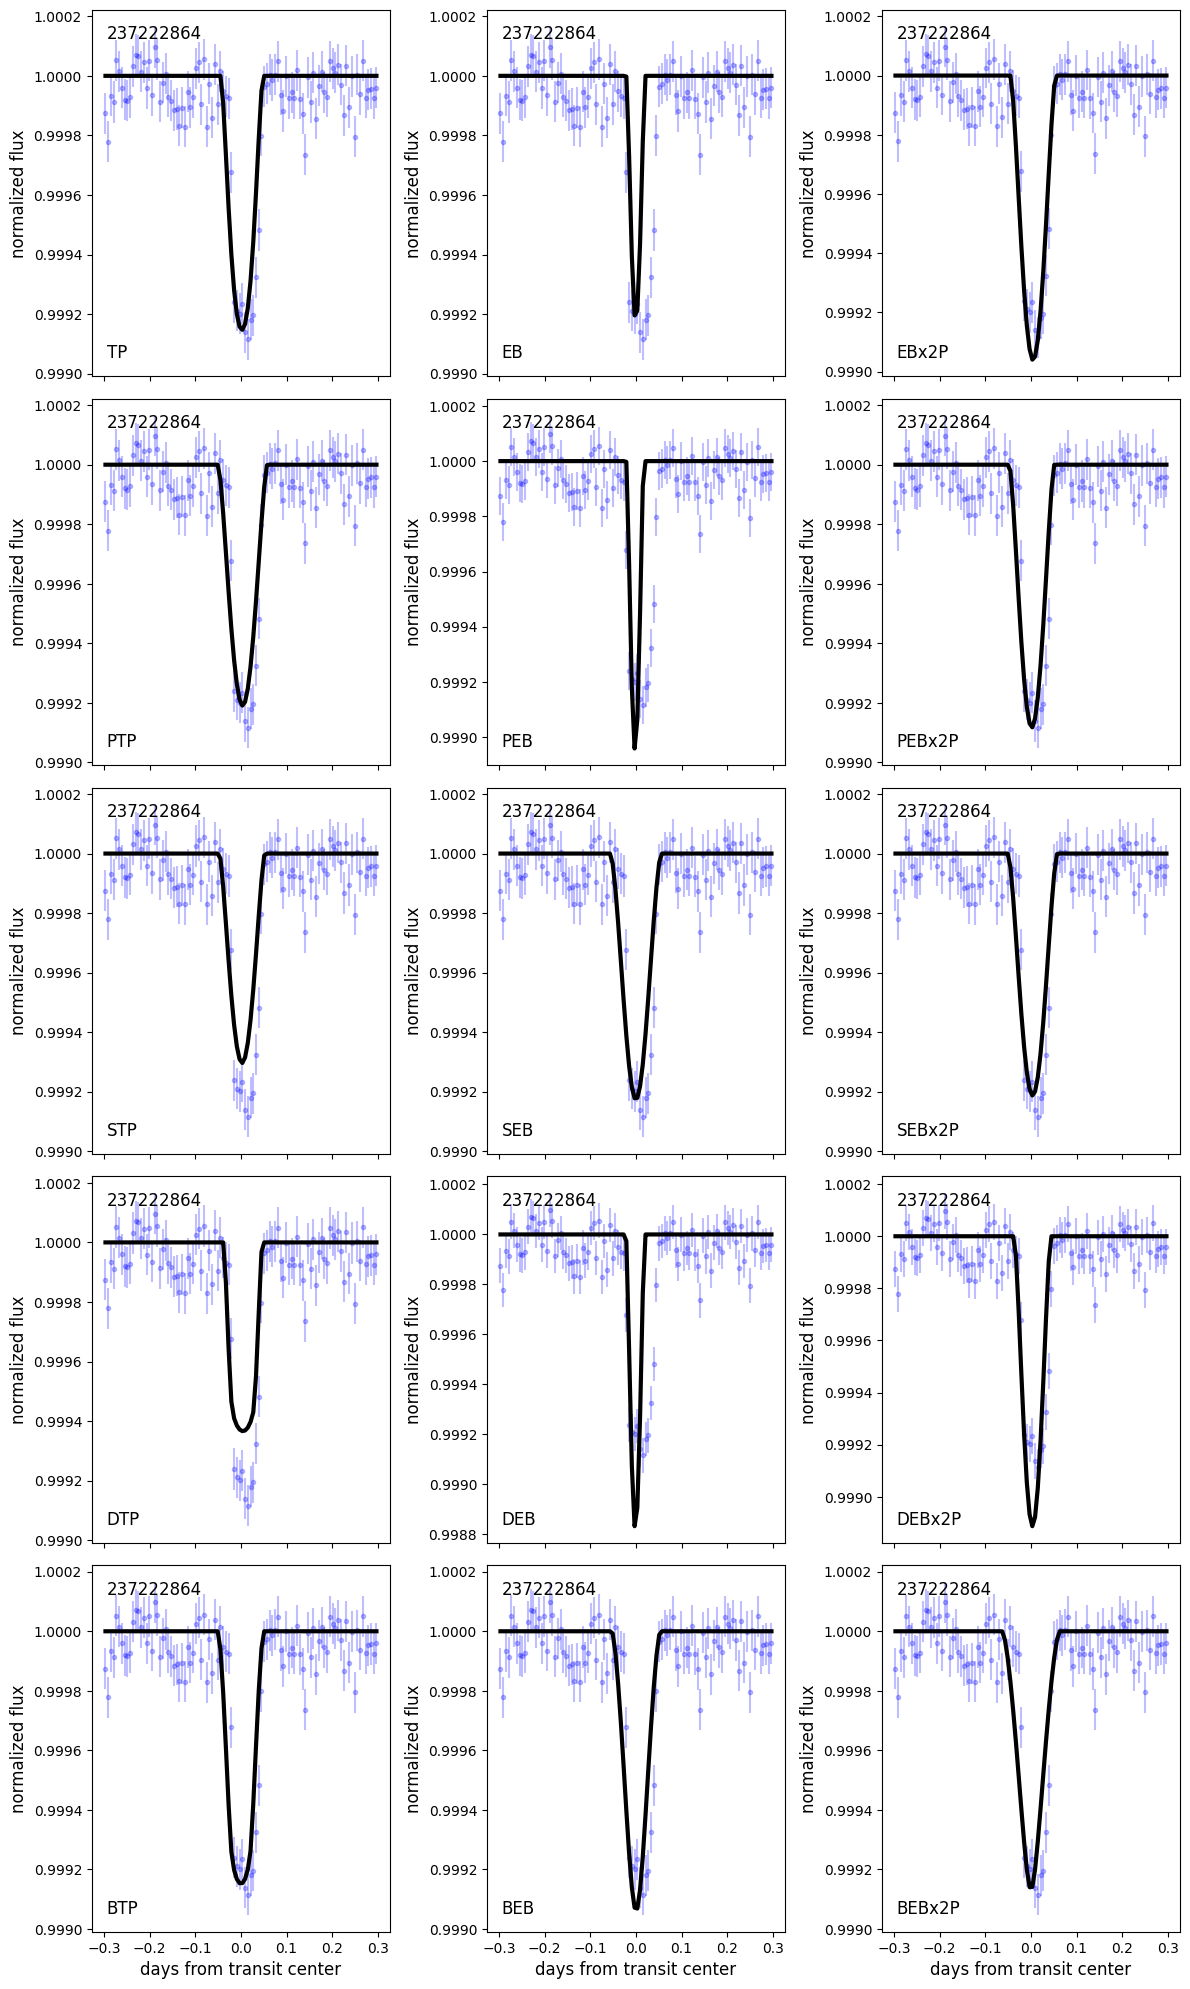

In [13]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [14]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.5506530349499924 +/- 0.4967613872185857
NFPP = 0.0 +/- 0.0
CPU times: user 20min 23s, sys: 25.9 s, total: 20min 49s
Wall time: 15min 1s


Our final conclusion about this specified planet of TIC 237222864 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).